In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
cartier = pd.read_csv('cartier_catalog.csv') # читаем датасет

In [4]:
cartier # смотрим датасет

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png
...,...,...,...,...,...,...,...
687,B8301416,earrings,Clash de Cartier earrings Small Model,7500.0,pink gold,"Clash de Cartier earrings, small model, 18K pi...",/content/dam/rcq/car/19/15/81/7/1915817.png
688,B8301415,earrings,Clash de Cartier earrings Small Model,3900.0,pink gold,"Clash de Cartier earrings, small model, 18K pi...",/content/dam/rcq/car/19/15/81/5/1915815.png
689,N8515173,earrings,Clash de Cartier earrings Diamonds,13700.0,"pink gold, diamonds","Clash de Cartier earrings, 18K pink gold, each...",/content/dam/rcq/car/18/12/45/3/1812453.png
690,N8515218,earrings,Clash de Cartier earring Large Model,13700.0,"pink gold, amazonite","Clash de Cartier earring, large model, 18K pin...",/content/dam/rcq/car/20/35/93/8/2035938.png


In [5]:
cartier.shape # считаем сколько столбцов и колонок (для общего представления размера датасета)

(692, 7)

Вопрос: как меняется цена на украшение в зависимости от вида камней, вида металла, и типа украшения?

1) Для начала узнаем какие украшения преобладают

In [0]:
category = cartier["categorie"] 
j_values = category.value_counts().to_frame() # создаем новый датафрейм с типами украшений и соответсвующим количеством
j_values.reset_index(inplace=True)            # сортируем по кол-ву изделий
j_values.columns = ['j_type' , 'count']

In [7]:
j_values

,j_type,count
0,rings,259
1,bracelets,160
2,necklaces,155
3,earrings,118


In [0]:
# строим столбчатую диаграмму
color_dict1 = {'rings': "blue", 
              'bracelets': "red", 
              'necklaces': "green", 
              'earrings': "yellow"}

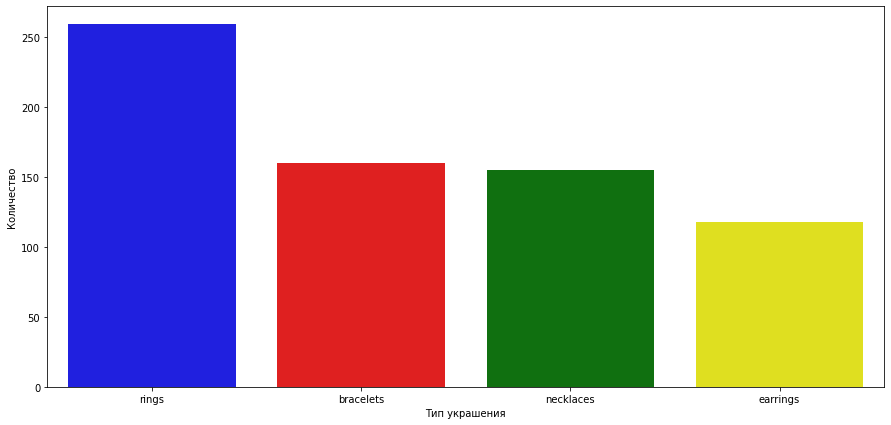

In [9]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'j_type', y= 'count', data= j_values , palette = color_dict1)
plt.xlabel('Тип украшения')
plt.ylabel('Количество')
plt.show()

Вывод: больше всего в каталоге колец

2) Теперь посмотрим как цена колеблется в зависимости от типа украшения

In [0]:
cartier_gp0_gem = cartier.groupby(["categorie"])["price"].mean().round(1).to_frame() # группируем столбцы категории и цены в новый датафрейм
cartier_gp0_gem = cartier_gp0_gem.reset_index()                                      # и сразу же сопоставляем каждой категории среднюю цену

In [11]:
cartier_gp0_gem # проверяем датафрейм

,categorie,price
0,bracelets,44390.2
1,earrings,23653.4
2,necklaces,34155.6
3,rings,13652.2


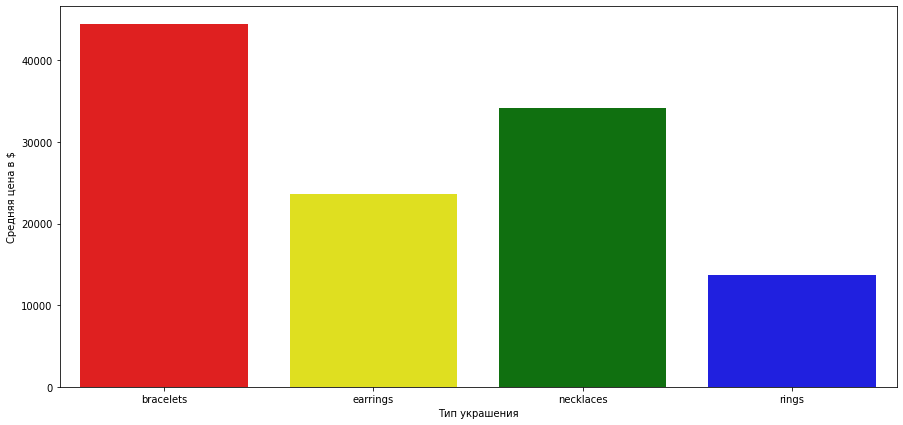

In [12]:
plt.figure(figsize=(15, 7)) # строим столбчатую диаграмму
sns.barplot(x= 'categorie', y= 'price', data= cartier_gp0_gem , palette = color_dict1)
plt.xlabel('Тип украшения')
plt.ylabel('Средняя цена в $')
plt.show()

Вывод: более дорогоими украшениями чаще оказываются браслеты и ожерелья, их средняя цена находится в районе 45к и 35к соответственно; более дешевые - серьги и кольца, со средней ценой в районе 24к и 14к соответственно

3) Узнаем какие металлы в каких украшениях преобладают

In [0]:
# Преобразуем наш датасет, добавляя новые колонки с хар-ми украшений
def tag_spiliter(dataframe , col_name , delimiter , metal , first_gem , second_gem , third_gem , fourth_gem):
    dataframe['str_split'] = dataframe[col_name].str.split(delimiter)
    dataframe[metal] = dataframe.str_split.str.get(0).str.strip()
    dataframe[first_gem] = dataframe.str_split.str.get(1).str.strip()
    dataframe[second_gem] = dataframe.str_split.str.get(2).str.strip()
    dataframe[third_gem] = dataframe.str_split.str.get(3).str.strip()
    dataframe[fourth_gem] = dataframe.str_split.str.get(4).str.strip()
    
    dataframe.fillna('NA' , inplace=True)
    del dataframe['str_split']
tag_spiliter(cartier , 'tags' , ',' , 'metal' , 'gem' , 'second_gem' , 'third_gem' , 'fourth_gem')

In [14]:
cartier.head(2) # проверяем что получили

,ref,categorie,title,price,tags,description,image,metal,gem,second_gem,third_gem,fourth_gem
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png,yellow gold,NA,NA,NA,NA
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png,platinum,NA,NA,NA,NA


In [0]:
# удаляем лишние колонки/колонки не несущие полезной информации
cartier.drop(['ref' , 'image' , 'tags' , 'title' , 'description'] , axis  = 1 , inplace=True)

In [16]:
cartier.head(2) # проверяем результат

,categorie,price,metal,gem,second_gem,third_gem,fourth_gem
0,rings,1650.0,yellow gold,NA,NA,NA,NA
1,rings,3650.0,platinum,NA,NA,NA,NA


In [0]:
gems = pd.concat([cartier["gem"],cartier["second_gem"],cartier["third_gem"],cartier["fourth_gem"]], axis= 0)
gems_values = gems.value_counts()[1:].to_frame() # создаем новый датафрейм
gems_values.reset_index(inplace=True)
gems_values.columns = ['gem_type' , 'count']

In [18]:
gems_values # смотрим что получилось

,gem_type,count
0,diamonds,431
1,onyx,90
2,emeralds,70
3,diamond,61
4,yellow gold,37
5,pink gold,37
6,tsavorite garnets,35
7,sapphires,19
8,ceramic,17
9,lacquer,11


In [0]:
# Создаем словарь для цветов металлов 
color_dict2 = {'yellow gold': "#fcc72d", 
              'platinum': "#e5e4e2", 
              'pink gold': "#e9cdd0", 
              'white gold': "#f9f3d1", 
              'non-rhodiumized white gold': "#C0C0C0"}

In [0]:
cartier_category_metal = cartier.groupby('categorie')['metal'].value_counts().to_frame() # создаем новый датафрейм
cartier_category_metal.columns = ['count']                                               # и тут же сортируем
cartier_category_metal.reset_index(level = [0 , 1] , inplace=True)

In [21]:
cartier_category_metal.head(8) # проверяем

,categorie,metal,count
0,bracelets,white gold,61
1,bracelets,pink gold,52
2,bracelets,yellow gold,43
3,bracelets,platinum,4
4,earrings,white gold,54
5,earrings,pink gold,34
6,earrings,yellow gold,28
7,earrings,platinum,2


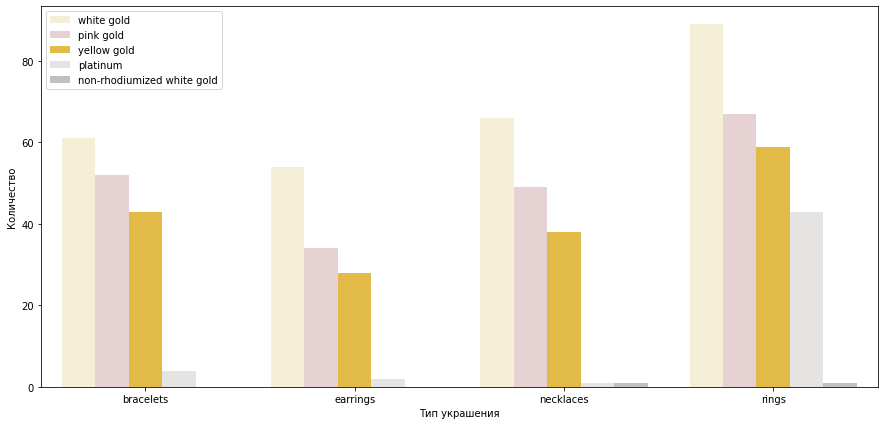

In [22]:
plt.figure(figsize=(15, 7)) # строим диаграмму
sns.barplot(x= "categorie", y= "count", hue= "metal", data= cartier_category_metal, 
            palette= color_dict2)
plt.xlabel("Тип украшения")
plt.ylabel("Количество")
plt.legend(loc= "upper left")
plt.show()

Вывод: во всех типах украшений преобладают изделия из белого золота, изделий из розового золота меньше, из желтого - еще меньше

4) Исследуем зависимость дороговизны украшения от металла, из которого оно сделано

In [0]:
cartier_gp1 = cartier.groupby(["categorie", "metal"])["price"].mean().round(2).to_frame() # новый датафрейм
cartier_gp1 = cartier_gp1.reset_index()                                                   # сортируем сначала по типу украшения, потом по металлу
                                                                                          # а в колонку прайс записываем среднее значение

In [24]:
cartier_gp1.head(8)

,categorie,metal,price
0,bracelets,pink gold,28741.92
1,bracelets,platinum,209250.00
2,bracelets,white gold,50363.28
3,bracelets,yellow gold,39504.42
4,earrings,pink gold,8146.47
5,earrings,platinum,117000.00
6,earrings,white gold,36350.56
7,earrings,yellow gold,11328.21


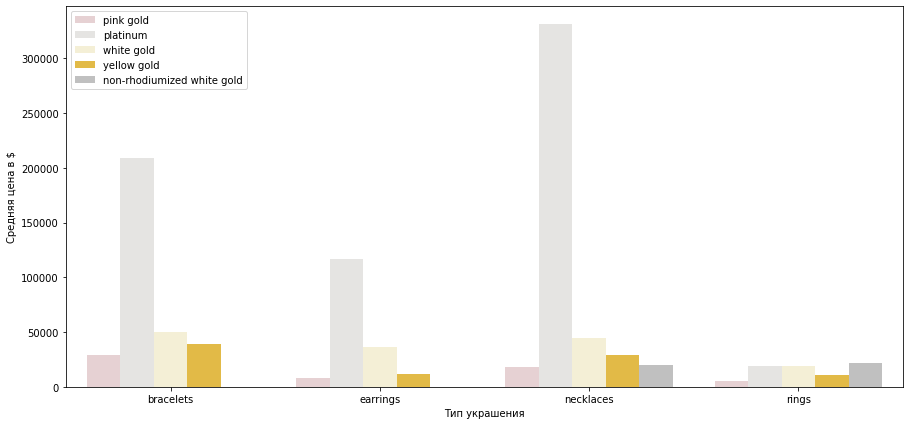

In [35]:
plt.figure(figsize=(15, 7)) # строим диаграмму
sns.barplot(x= 'categorie', y= 'price', hue= 'metal', data= cartier_gp1, palette= color_dict2)
plt.xlabel('Тип украшения')
plt.ylabel('Средняя цена в $')
plt.legend(loc= "upper left")
plt.show()

Вывод: украшения из платины значительно дороже украшений из других металлов

5) Узнаем какие драгоценные камни чаще встречаются в разных категориях украшений и какие из них дороже

In [0]:
cartier_gp_gem = cartier.groupby('categorie')['gem'].value_counts().to_frame() # новый датафрейм
cartier_gp_gem.columns = ['count']                                             # сортируем по типу украшений и преобладающим камням
cartier_gp_gem.reset_index(level = [0 , 1] , inplace=True)
cartier_gp_gem = cartier_gp_gem[cartier_gp_gem["gem"] != 'NA']
cartier_gp_gem=cartier_gp_gem.reset_index()

In [28]:
cartier_gp_gem.head(5) # проверка

,index,categorie,gem,count
0,0,bracelets,diamonds,68
1,2,bracelets,emeralds,15
2,3,bracelets,diamond,10
3,4,bracelets,tsavorite garnets,7
4,5,bracelets,ceramic,5


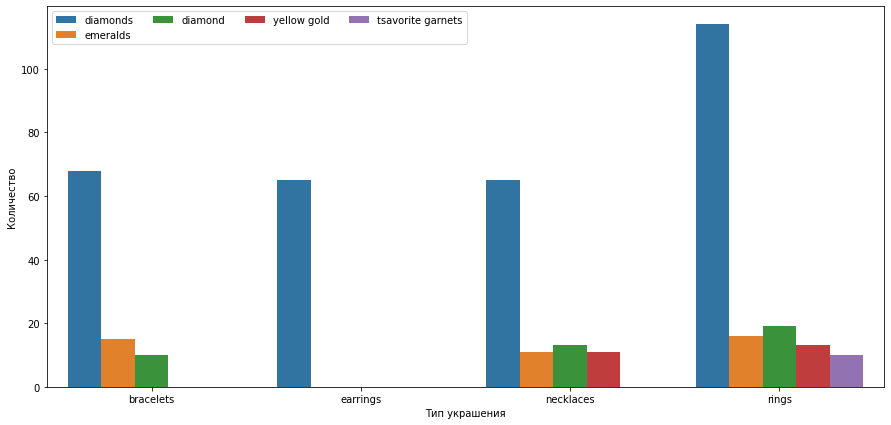

In [30]:
plt.figure(figsize=(15, 7)) # строим график по нашему новому датафрейму (как и до этого)
sns.barplot(x= 'categorie', y= 'count', hue= 'gem', data= cartier_gp_gem.drop(np.where(cartier_gp_gem['count'] < 10)[0]))
plt.xlabel('Тип украшения')
plt.ylabel('Количество')
plt.legend(ncol=4, loc= 'upper left')
plt.show()

Вывод: во всех категориях украшений преобладают бриллианты

(рассматривая частоту встречаемости, мы брали только самые распространенные камни (изделий с использованием камня > 10))

In [0]:
cartier_gp1_gem = cartier.groupby(["categorie", "gem"])["price"].mean().round(2).to_frame()
cartier_gp1_gem = cartier_gp1_gem.reset_index()
cartier_gp1_gem = cartier_gp1_gem[cartier_gp1_gem["gem"] != 'NA']
cartier_gp1_gem = cartier_gp1_gem.reset_index()

In [32]:
cartier_gp1_gem.head(8)

,index,categorie,gem,price
0,1,bracelets,amazonite,56000.00
1,2,bracelets,aquamarines,8250.00
2,3,bracelets,black lacquer,35000.00
3,4,bracelets,ceramic,13258.00
4,5,bracelets,chrysoprase,68500.00
5,6,bracelets,diamond,2052.00
6,7,bracelets,diamonds,54253.68
7,8,bracelets,emeralds,168426.67


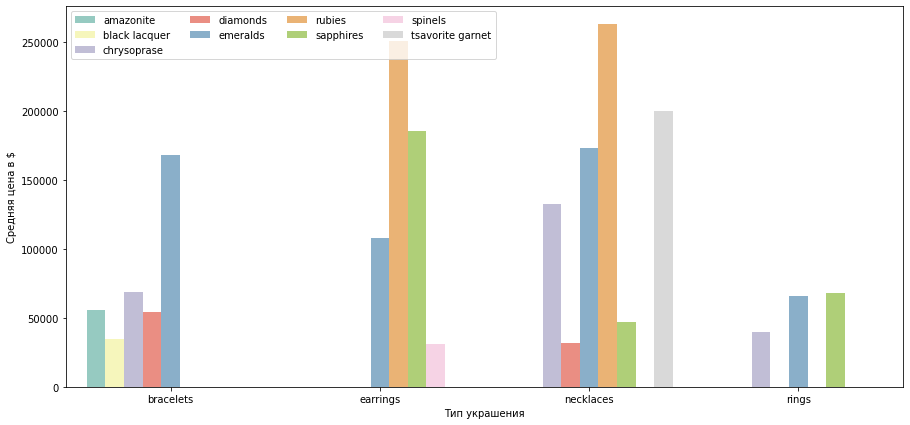

In [33]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'price', hue= 'gem', 
            data= cartier_gp1_gem.drop(np.where(cartier_gp1_gem['price'] < 30000)[0]) , 
            palette = sns.color_palette("Set3"))
plt.xlabel('Тип украшения')
plt.ylabel('Средняя цена в $')
plt.legend(ncol=4, loc= 'upper left')
plt.show()

Вывод: самые дорогие серьги и ожерелья включают в себя рубины, самые дорогие браслеты из изумрудов, а кольца из изумрудов и сапфиров

(рассматривая цены, мы брали только камни, входящие в украшения с самой высокой средней стоимостью (ср. цена > 30k $))

Таким образом, самые дорогие украшения в каждой категории: 
       
 - ожерелья из платины, украшенные рубинами;
 - браслеты из платины, украшенные изумрудами;
 - серьги из платины, украшенные рубинами;
 - кольца из любого металла, украшеные сапфирами или изумрудами
Во всех категориях чаще встречаются ювелирные изделия из белого золота, украшенные бриллиантами

Ну и в довершение посмотрим какое украшение самое дорогое, а какое самое дешевое

In [34]:
# общие сведения о датасете
print(cartier[cartier['price']==cartier['price'].max()], end = '\n\n\n') # самое дорогое украшение
print(cartier[cartier['price']==cartier['price'].min()], end = '\n\n\n') # самое дешевое
int(cartier.price.mean()) # средняя цена среди всех украшений

     categorie     price       metal       gem second_gem third_gem fourth_gem
533  necklaces  370000.0  white gold  diamonds         NA        NA         NA


    categorie  price        metal gem second_gem third_gem fourth_gem
579  earrings  500.0  yellow gold  NA         NA        NA         NA




27057